In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
df = pd.read_csv(r"data\\190819_file24_concat.csv", index_col=0, header=None).T

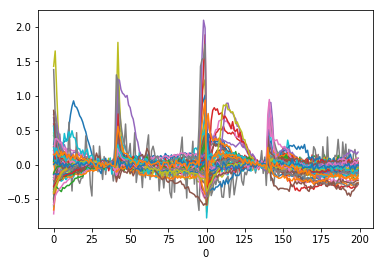

In [3]:
df.T.plot(legend=False)

In [4]:
means = []
stddevs = []
for label in list(df):
    means += [df[label].mean()]
    stddevs += [df[label].std()]

sumstddevs = []
for row in range(1, len(df[0]) + 1):
    s = 0
    for col in list(df):
        s += abs(df[col][row] - means[col]) / stddevs[col]
    sumstddevs += [s]
sumstddevs

[284.41117849540245,
 146.95518019736897,
 111.08941630275835,
 271.7101340093166,
 122.89912500911333,
 92.29021661993592,
 267.4332919534588,
 83.98408643146466,
 157.04641372961098,
 68.14613329800964,
 160.5366956327031,
 109.40083924241276,
 128.09491819768084,
 136.75956108929435,
 143.00249252166714,
 156.56906078116646,
 97.00172046910762,
 353.02104265639656,
 184.40858093780074,
 202.92814260262278,
 214.75372602941832,
 116.55151162207993,
 111.21271209444527,
 173.70954894759507,
 274.63934791393103,
 87.95670544982441,
 201.7490355988434,
 219.07523816368862,
 84.46679823328,
 104.43779379846343,
 98.22168720771373,
 211.76493374947336,
 122.25275637931931,
 106.90502402942084,
 61.379564377523614,
 306.3430310087036,
 125.36282826009807,
 71.44080164153436,
 138.42908178473624,
 100.87903262122926,
 79.06861662857187,
 129.34373908735813,
 50.82137420927184,
 68.29942041062188,
 110.82285524233646,
 146.95315356550918,
 105.54296130710335,
 70.62209311188064,
 85.44047816

In [6]:
[1 for s in sumstddevs if s > 70 else 0]

SyntaxError: invalid syntax (<ipython-input-6-3e5ab871a513>, line 1)

In [5]:
df[0]

1     0.296508
2    -0.491238
3    -0.356916
4    -0.581451
5    -0.406185
6    -0.491532
7    -0.712955
8    -0.508001
9    -0.474422
10   -0.405779
11    0.061184
12   -0.144079
13    0.043823
14    0.201000
15    0.418318
16   -0.427091
17   -0.295739
18    0.146821
19    1.425565
20   -0.610045
21    0.673972
22   -0.655466
23   -0.221578
24    0.590192
25    0.726635
26   -0.542354
27   -0.577798
28    1.377686
29    0.022431
30   -0.190767
31    0.554667
32    0.027091
33   -0.188155
34    0.257796
35   -0.146628
36   -0.381751
37   -0.217757
38   -0.346314
39    0.459537
40    0.557794
41   -0.140055
42   -0.417093
43   -0.121773
44   -0.320062
45    0.680371
46    0.786523
47    0.146531
48   -0.389523
49   -0.400422
50    0.247374
51    0.003018
52    0.147880
Name: 0, dtype: float64

In [4]:
# https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
from sklearn.decomposition import PCA

In [5]:
pca = PCA(n_components=2)

In [6]:
principalComponents = pca.fit_transform(df)

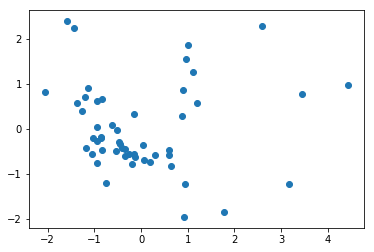

In [7]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])

[[ 3.49596952  1.33527939]
 [-0.13320134 -0.60262649]
 [-1.69409869  1.81396193]
 [ 1.01369984  1.06002837]
 [ 1.70330714 -1.57048501]
 [-0.92765969  0.11317348]]
[3 5 5 2 5 5 2 5 5 5 3 1 1 1 3 5 5 4 4 1 4 5 1 0 0 5 1 0 1 1 1 5 1 1 5 2 1
 5 3 1 1 5 1 1 1 4 1 5 5 3 1 3]


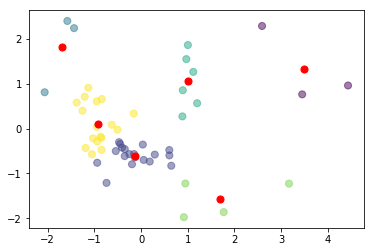

In [8]:
# https://datatofish.com/k-means-clustering-python/
nc = 6
kmeans = KMeans(n_clusters=nc).fit(principalDf)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print(centroids)
print(labels)

plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

In [10]:
l = []
for i in range(nc):
    temp = []
    for j in range(len(labels)):
        if labels[j] == i:
            temp += [j + 1]
    l += [temp]
l

[[24, 25, 28],
 [12, 13, 14, 20, 23, 27, 29, 30, 31, 33, 34, 37, 40, 41, 43, 44, 45, 47, 51],
 [4, 7, 36],
 [1, 11, 15, 39, 50, 52],
 [18, 19, 21, 46],
 [2, 3, 5, 6, 8, 9, 10, 16, 17, 22, 26, 32, 35, 38, 42, 48, 49]]

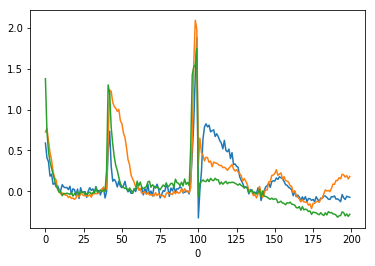

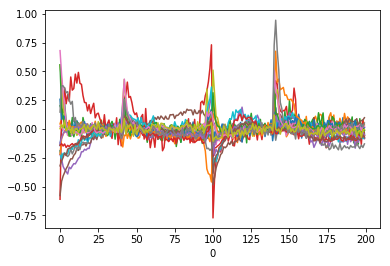

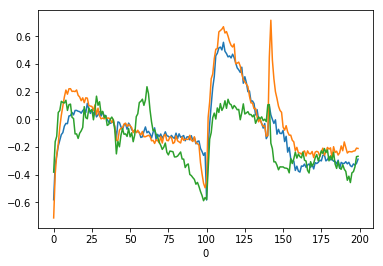

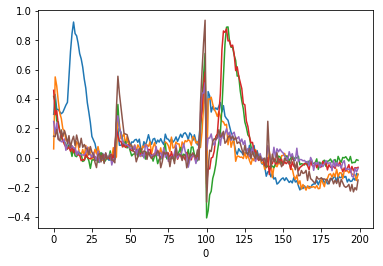

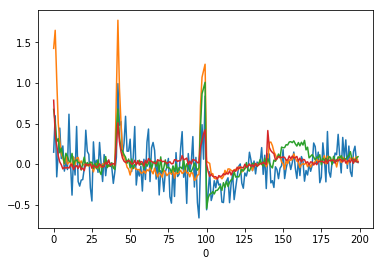

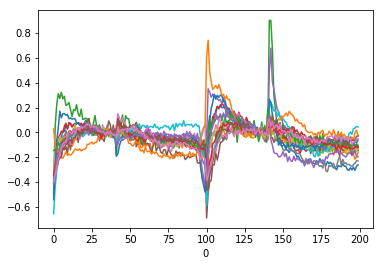

In [11]:
d = df
for i in range(nc):
    df1 = d.T[l[i]]
    df1.plot(legend=False)